In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read csv data into a dataframe
dataframe = pd.read_csv("kc_house_data.csv")

# preview the top 5 rows
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


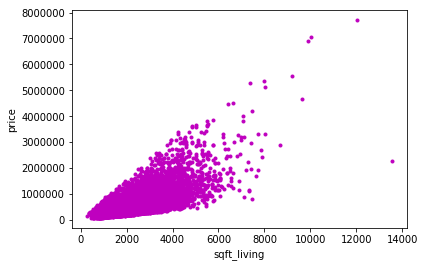

In [6]:
# make 2d data graph
dataframe2D = dataframe[["price", "sqft_living"]]
x = dataframe2D["sqft_living"]
y = dataframe2D["price"]

# visualize the data
plt.scatter(x, y, color = 'm', marker = '.')
plt.xlabel(str(dataframe2D.columns[1]))
plt.ylabel(str(dataframe2D.columns[0]))
plt.show()

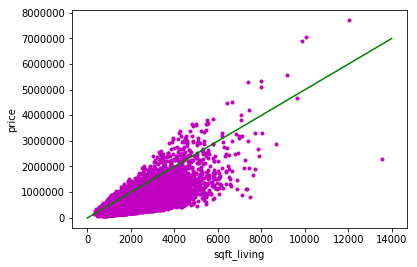

In [7]:
# have guess for the line of best fit
W_guess = 500            # y = mx + c, y = Wx + b
b_guess = -10000
x_line = np.array(range(0, 14000, 1))
y_line = np.array(W_guess*x_line + b_guess)

# visualize the data
plt.scatter(x, y, color = 'm', marker = '.')
plt.plot(x_line, y_line, color = 'g')
plt.xlabel(str(dataframe2D.columns[1]))
plt.ylabel(str(dataframe2D.columns[0]))
plt.show()

-591000.0


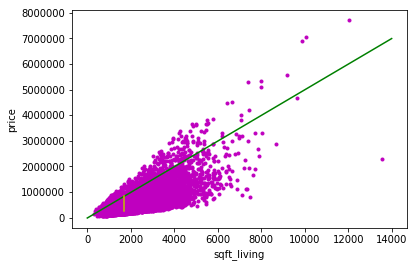

In [9]:
# error 1500th point
error_1500 = y.values[1500] - (W_guess*x.values[1500] + b_guess)
print(error_1500)

# visualize the data
plt.scatter(x, y, color = 'm', marker = '.')
plt.plot(x_line, y_line, color = 'g')
plt.plot([x.values[1500], x.values[1500]], [y.values[1500], (W_guess*x.values[1500] + b_guess)], color = 'y')
plt.xlabel(str(dataframe2D.columns[1]))
plt.ylabel(str(dataframe2D.columns[0]))
plt.show()

The cost of the line is 106553707492.61949


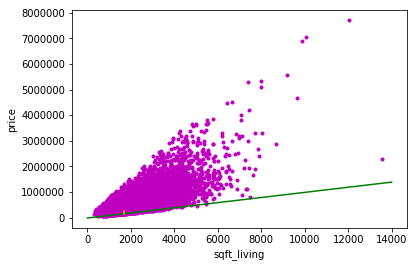

In [16]:
# have guess for the line of best fit
W_guess = 100            # y = mx + c, y = Wx + b
b_guess = -10000
x_line = np.array(range(0, 14000, 1))
y_line = np.array(W_guess*x_line + b_guess)

rows, columns = dataframe2D.shape

error_sum = 0
for i in range(0, rows, 1):
    error = y.values[i] - (W_guess*x.values[i] + b_guess)
    error_sum = error_sum + error**2

J = (1/(2*rows)) * error_sum
print("The cost of the line is " + str(J))

# visualize the data
plt.scatter(x, y, color = 'm', marker = '.')
plt.plot(x_line, y_line, color = 'g')
plt.plot([x.values[1500], x.values[1500]], [y.values[1500], (W_guess*x.values[1500] + b_guess)], color = 'y')
plt.xlabel(str(dataframe2D.columns[1]))
plt.ylabel(str(dataframe2D.columns[0]))
plt.show()

# W=500, b=-10000     -> 174417948017.34073
# W=1000, b=-10000    -> 1422380700867.4707
# W=100, b=-10000     -> 106553707492.61949
                        

In [ ]:
X = np.array(x.values)
Y = np.array(y.values)

# Ordinary Least Squares Method - Wikipedia
# Weigth = Covariance(x,y)/Variance(x)

W = np.cov(X,Y)[0][1]/np.var(X)     # [[xx, xy], [yx, yy]]
b = np.mean(Y) - W * np.mean(X)
print(W)
print(b)

rows, columns = dataframe2D.shape
error_sum = 0
for i in range(0, rows, 1):
    error = y.values[i] - (W*x.values[i] + b)
    error_sum = error_sum + error**2

J = (1/(2*rows)) * error_sum
print("The cost of the line of best fit is " + str(J))

x_line_best_fit = np.array(range(0, 14000, 1))
y_line_best_fit = np.array(W*x_line + b)

# visualize the data
plt.scatter(x, y, color = 'm', marker = '.')
plt.plot(x_line, y_line, color = 'g')
plt.plot(x_line_best_fit, y_line_best_fit, color = 'b')
plt.plot([x.values[1500], x.values[1500]], [y.values[1500], (W_guess*x.values[1500] + b_guess)], color = 'y')
plt.xlabel(str(dataframe2D.columns[1]))
plt.ylabel(str(dataframe2D.columns[0]))
plt.show()

# W=500, b=-10000     -> 174417948017.34073
# W=1000, b=-10000    -> 1422380700867.4707
# W=100, b=-10000     -> 106553707492.61949
# W=280, b=-43895     -> 34218594993.92921

The cost of the line of best fit is 34218594993.92921


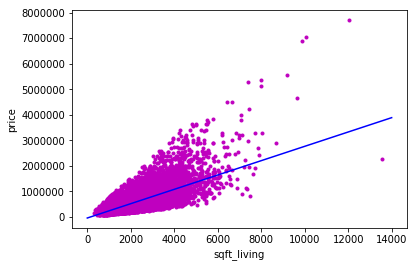

In [3]:
# FULL CODE

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read csv data into a dataframe
dataframe = pd.read_csv("kc_house_data.csv")
dataframe = dataframe.drop(columns="id")
dataframe = dataframe.drop(columns="date")

# make 2D data graph for line of best fit
dataframe2D = dataframe[["price", "sqft_living"]]
x = dataframe2D["sqft_living"]
y = dataframe2D["price"]

X = np.array(x.values)
Y = np.array(y.values)

# Ordinary Least Squares Method - wikipedia
# Weights = Covariance(x, y)/Variance(x)

W = np.cov(X,Y)[0][1] / np.var(X) #[0][1] selects the covariance of X,Y. [0][0] will be X,X, [1][0] will be Y,X etc
b = np.mean(Y) - W * np.mean(X)

rows, columns = dataframe2D.shape
error_sum = 0
for i in range(0, rows, 1):
    error = y.values[i] - (W*x.values[i] + b)
    error_sum = error_sum + (error**2)
J = (1/(2*rows)) * error_sum
print("The cost of the line of best fit is " + str(J))

x_line_best_fit = np.array(range(0, 14000, 1))
y_line_best_fit = np.array(W*x_line_best_fit + b) # y = Wx + b

#visualize data 
plt.scatter(x, y, color = 'm', marker = '.')
plt.plot(x_line_best_fit, y_line_best_fit, color = 'b')
plt.xlabel(str(dataframe2D.columns[1]))
plt.ylabel(str(dataframe2D.columns[0]))
plt.show()

#34218594993.92921